In [1]:
library('tidyverse')

org_opts <- options()

── Attaching packages ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ purrr   1.0.1 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.3.0      ✔ stringr 1.5.0 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [2]:
read_csv('../clinical_metadata.csv')

Rows: 11 Columns: 7
── Column specification ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (5): Specimen ID, Sample id, primary/recurrence, central/conventional, M...
dbl (2): age, grade

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Specimen ID,Sample id,age,primary/recurrence,grade,central/conventional,Margin
<chr>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>
0-20-100-00479,S10-479,NA,primary,3,central,M0
1-20-140-11208,S14-11208,69,primary,3,central,M1
1-20-150-16380,S15-16380,59,recurrence,2,central,M0
1-20-140-09996,S14-9996,103,primary,3,central,M2
1- S-17-0004703,S17-4703,44,primary,2,conventional,NA
NMS22-28934,NMS22-28934,50,primary,3,conventional,M0
0-20-080-25548,S08-25548,62,primary,NA,conventional,M2
NMS22-13453,NMS22-13453,50,primary,2,NA,NA
NMS23-00471,NMS23-471,56,primary,2,conventional,M0


In [3]:
all_trb_files <-
    list.files('NWU_101176_RNA_data_release/data_release/03_mixcr_assemble_result/', recursive=TRUE, pattern='.clones_TRB', full.names=TRUE)

all_trb_files

[1] "NWU_101176_RNA_data_release/data_release/03_mixcr_assemble_result//1_113026/1_113026.clones_TRB.tsv"  
 [2] "NWU_101176_RNA_data_release/data_release/03_mixcr_assemble_result//10_113046/10_113046.clones_TRB.tsv"
 [3] "NWU_101176_RNA_data_release/data_release/03_mixcr_assemble_result//11_113047/11_113047.clones_TRB.tsv"
 [4] "NWU_101176_RNA_data_release/data_release/03_mixcr_assemble_result//2_113030/2_113030.clones_TRB.tsv"  
 [5] "NWU_101176_RNA_data_release/data_release/03_mixcr_assemble_result//3_113032/3_113032.clones_TRB.tsv"  
 [6] "NWU_101176_RNA_data_release/data_release/03_mixcr_assemble_result//4_113033/4_113033.clones_TRB.tsv"  
 [7] "NWU_101176_RNA_data_release/data_release/03_mixcr_assemble_result//5_113034/5_113034.clones_TRB.tsv"  
 [8] "NWU_101176_RNA_data_release/data_release/03_mixcr_assemble_result//6_113037/6_113037.clones_TRB.tsv"  
 [9] "NWU_101176_RNA_data_release/data_release/03_mixcr_assemble_result//7_113038/7_113038.clones_TRB.tsv"  
[10] "NWU_101176_RNA_data_release/data_release/03_mixcr_assemble_result//8_113042/8_113042.clones_TRB.tsv"  
[11] "NWU_101176_RNA_data_release/data_release/03_mixcr_assemble_result//9_113044/9_113044.clones_TRB.tsv"

In [4]:
all_trb_files_tbl <-
    tibble(`file_path`=all_trb_files) %>%
    mutate(
        `file_name`=str_replace_all(`file_path`, '.*/', ''),
        `cellecta_sample_name`=str_replace_all(`file_name`, '\\..*', '')
    )

all_trb_files_tbl

file_path,file_name,cellecta_sample_name
<chr>,<chr>,<chr>
NWU_101176_RNA_data_release/data_release/03_mixcr_assemble_result//1_113026/1_113026.clones_TRB.tsv,1_113026.clones_TRB.tsv,1_113026
NWU_101176_RNA_data_release/data_release/03_mixcr_assemble_result//10_113046/10_113046.clones_TRB.tsv,10_113046.clones_TRB.tsv,10_113046
NWU_101176_RNA_data_release/data_release/03_mixcr_assemble_result//11_113047/11_113047.clones_TRB.tsv,11_113047.clones_TRB.tsv,11_113047
NWU_101176_RNA_data_release/data_release/03_mixcr_assemble_result//2_113030/2_113030.clones_TRB.tsv,2_113030.clones_TRB.tsv,2_113030
NWU_101176_RNA_data_release/data_release/03_mixcr_assemble_result//3_113032/3_113032.clones_TRB.tsv,3_113032.clones_TRB.tsv,3_113032
NWU_101176_RNA_data_release/data_release/03_mixcr_assemble_result//4_113033/4_113033.clones_TRB.tsv,4_113033.clones_TRB.tsv,4_113033
NWU_101176_RNA_data_release/data_release/03_mixcr_assemble_result//5_113034/5_113034.clones_TRB.tsv,5_113034.clones_TRB.tsv,5_113034
NWU_101176_RNA_data_release/data_release/03_mixcr_assemble_result//6_113037/6_113037.clones_TRB.tsv,6_113037.clones_TRB.tsv,6_113037
NWU_101176_RNA_data_release/data_release/03_mixcr_assemble_result//7_113038/7_113038.clones_TRB.tsv,7_113038.clones_TRB.tsv,7_113038


In [5]:
all_trb_combined_tbl <-
    all_trb_files_tbl %>%
    pull(`file_path`) %>%
    map_df(function(one_file_path) {
        read_tsv(one_file_path, show_col_types=FALSE) %>%
            mutate(`file_path`=one_file_path)
    }) %>%
    left_join(all_trb_files_tbl, by='file_path') %>%
    select(-`file_path`, `file_name`) %>%
    relocate(`cellecta_sample_name`)

all_trb_combined_tbl %>%
    head()

cellecta_sample_name,cloneId,readCount,readFraction,uniqueMoleculeCount,uniqueMoleculeFraction,targetSequences,targetQualities,allVHitsWithScore,allDHitsWithScore,⋯,allCHitsWithScore,allVAlignments,allDAlignments,allJAlignments,allCAlignments,nSeqCDR3,minQualCDR3,aaSeqCDR3,refPoints,file_name
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<chr>
1_113026,1,90832,0.026123707,6,0.03191489,TGTGCCAGCAGCTTTACGGGACTGTCCACCGGGGAGCTGTTTTTT,[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[,TRBV13*00(496.5),"TRBD2*00(35),TRBD1*00(30)",⋯,TRBC2*00(299.9),377|391|414|0|14||140.0,15|22|48|16|23||35.0;11|17|36|16|22||30.0,24|43|71|26|45||190.0,NA,TGTGCCAGCAGCTTTACGGGACTGTCCACCGGGGAGCTGTTTTTT,58,CASSFTGLSTGELFF,:::::::::0:-3:14:16:1:-10:23:26:-4:45:::,1_113026.clones_TRB.tsv
1_113026,3,51355,0.014769938,3,0.01595745,TGTGCCAGCAGCTTAGGGTTGGGACAGGGGCTGGATAGGACTGAAGCTTTCTTT,[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[,TRBV7-2*00(610.3),TRBD1*00(50),⋯,TRBC1*00(289.2),350|366|387|0|16||160.0,12|22|36|20|30||50.0,25|40|68|39|54||150.0,NA,TGTGCCAGCAGCTTAGGGTTGGGACAGGGGCTGGATAGGACTGAAGCTTTCTTT,58,CASSLGLGQGLDRTEAFF,:::::::::0:-1:16:20:0:-2:30:39:-5:54:::,1_113026.clones_TRB.tsv
1_113026,5,49793,0.014320699,3,0.01595745,TGCAGCGTGGGACTAGCGGTTGGAAAGGATACGCAGTATTTT,[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[,TRBV29-1*00(457.3),TRBD2*00(55),⋯,TRBC2*00(300.9),341|349|375|0|8||80.0,16|27|48|8|19||55.0,26|41|69|27|42||150.0,NA,TGCAGCGTGGGACTAGCGGTTGGAAAGGATACGCAGTATTTT,58,CSVGLAVGKDTQYF,:::::::::0:-6:8:8:0:-5:19:27:-6:42:::,1_113026.clones_TRB.tsv
1_113026,2,43221,0.012430561,3,0.01595745,TGTGCCAGTACTCCGACAGGGGGCACGTATGAGCAGTTCTTC,[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[,TRBV19*00(599.6),TRBD1*00(50),⋯,TRBC2*00(302.1),347|357|384|0|10||100.0,14|24|36|14|24||50.0,28|42|70|28|42||140.0,NA,TGTGCCAGTACTCCGACAGGGGGCACGTATGAGCAGTTCTTC,58,CASTPTGGTYEQFF,:::::::::0:-7:10:14:-2:0:24:28:-8:42:::,1_113026.clones_TRB.tsv
1_113026,12,34983,0.010061274,2,0.01063830,TGTGCCAGCGGGGACAGTCTAACCTACGAGCAGTACTTC,[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[,TRBV7-9*00(630),TRBD1*00(35),⋯,TRBC2*00(301.6),350|359|387|0|9||90.0,12|19|36|10|17||35.0,22|39|67|22|39||170.0,NA,TGTGCCAGCGGGGACAGTCTAACCTACGAGCAGTACTTC,58,CASGDSLTYEQYF,:::::::::0:-8:9:10:0:-5:17:22:-2:39:::,1_113026.clones_TRB.tsv
1_113026,14,34187,0.009832341,2,0.01063830,TGTGCCAGCAGCTTAGGGTTGGGACAGGGGTTGGATAGGACTGAAGCTTTCTTT,[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[,TRBV7-2*00(681.6),TRBD1*00(50),⋯,TRBC1*00(300.6),350|366|387|0|16||160.0,12|22|36|20|30||50.0,25|40|68|39|54||150.0,NA,TGTGCCAGCAGCTTAGGGTTGGGACAGGGGTTGGATAGGACTGAAGCTTTCTTT,58,CASSLGLGQGLDRTEAFF,:::::::::0:-1:16:20:0:-2:30:39:-5:54:::,1_113026.clones_TRB.tsv


In [6]:
cpk_tbl <-
    all_trb_combined_tbl %>%
    group_by(`cellecta_sample_name`) %>%
    summarize(
        `ucdr3_cnt`=`aaSeqCDR3` %>% unique() %>% length(),
        `kiloreads`=sum(`readCount`)/1000,
        .groups='drop'
    ) %>%
    mutate(`CPK`=`ucdr3_cnt`/`kiloreads`) %>%
    arrange(`CPK`)

cpk_tbl

cellecta_sample_name,ucdr3_cnt,kiloreads,CPK
<chr>,<int>,<dbl>,<dbl>
11_113047,32,2801.622,0.01142195
3_113032,26,1895.772,0.01371473
6_113037,54,3870.685,0.01395102
2_113030,1,69.327,0.01442439
5_113034,5,298.709,0.01673870
4_113033,13,619.605,0.02098111
1_113026,173,3476.995,0.04975561
7_113038,476,5457.168,0.08722473
8_113042,522,5831.292,0.08951704


In [7]:
cpk_tbl %>%
    pull(`CPK`) %>%
    summary()

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.01142 0.01419 0.02098 0.22337 0.08837 1.12090 

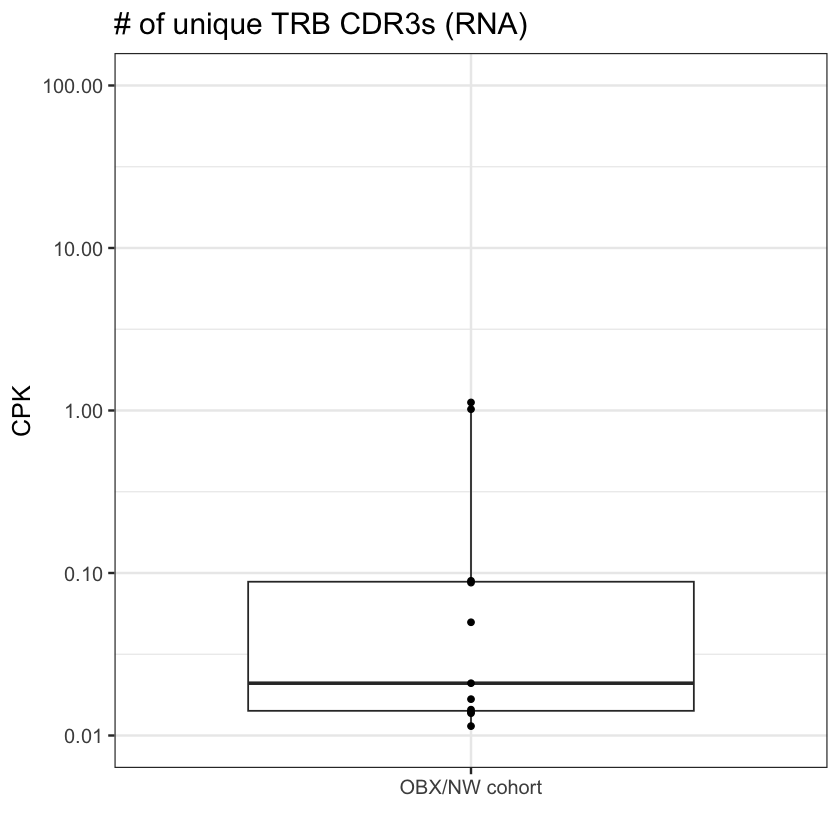

In [9]:
cpk_tbl %>%
    ggplot(aes(x='OBX/NW cohort', y=`CPK`)) +
        geom_boxplot() +
        geom_point() +
        scale_y_log10(limits=c(0.01, 100), labels=scales::comma) +
        theme_bw(base_size=15) +
        labs(
            title='# of unique TRB CDR3s (RNA)',
            x=''
        )